In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [58]:
#Load dataset
train_data=pd.read_csv(r"C:\Users\user\Desktop\Data sets\car data.csv")

In [59]:
train_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [60]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [61]:
#checking the shape of the data
train_data.shape

(301, 9)

In [62]:
print(train_data['Fuel_Type'].unique())
print(train_data['Seller_Type'].unique())
print(train_data['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [63]:
#Descriptive statastics
train_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [64]:
#checking missing values
np.sum(train_data.isnull())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [65]:
#adding new column Current Year 
train_data['Current_year']=2020

In [66]:
#creating one more new colums no of years based on Current year and year
train_data['no_years']=train_data['Current_year']-train_data['Year']

In [67]:
#Drop unnesseary columns from the final dataset
train_data.drop(['Car_Name',"Year",'Current_year'],axis=1,inplace=True)

In [68]:
train_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [69]:
#perform one hot encoading use parameters drop_first=True
final_data=pd.get_dummies(train_data,drop_first=True)

In [70]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [71]:
final_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


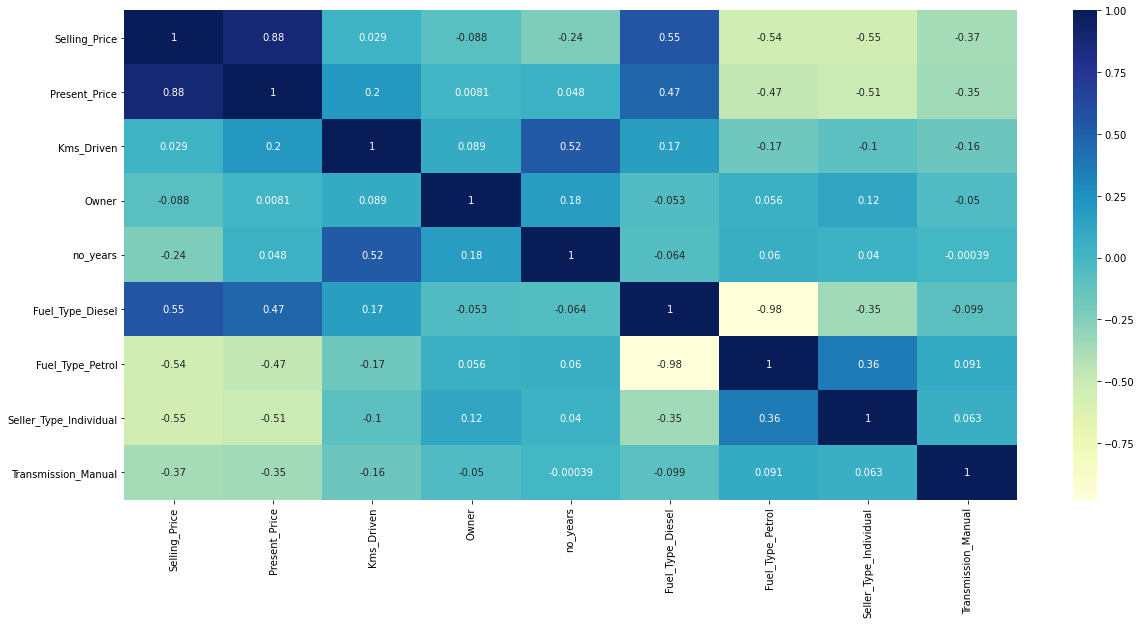

In [79]:
plt.figure(figsize=(20,9))
sns.heatmap(final_data.corr(),annot=True,cmap='YlGnBu')

In [80]:
features=final_data.iloc[:,1:]
label=final_data.iloc[:,0]

In [82]:
features.head()

,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [83]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(features,label)

ExtraTreesRegressor()

In [84]:
print(model.feature_importances_)

[3.79170346e-01 4.37777349e-02 3.08329987e-04 7.56408048e-02
 2.20012299e-01 1.44439678e-02 1.29204893e-01 1.37441625e-01]


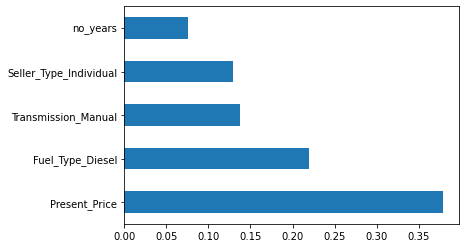

In [88]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [89]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)

In [97]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [98]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [99]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [101]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

In [102]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [103]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.3s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=15, total=   0.3s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.5s
[CV] n_estimators=500, min_samples_split=100, mi

[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=300, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [104]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [105]:
rf_random.best_score_

-3.723752738901343

In [106]:
prediction=rf_random.predict(X_test)

In [107]:
prediction

array([ 6.84338512,  0.53140492,  4.86386667,  9.35676098, 13.04764714,
        5.16445079,  3.28472702,  0.45115607,  3.9487421 ,  4.77081806,
        2.95271261,  0.73628337,  4.90261786,  7.09019218,  7.80638051,
       12.6394746 ,  6.91303762,  4.00129964,  0.49807179,  1.54730238,
        3.27430666,  5.01432698,  5.06679901,  9.97700218,  0.1723944 ,
        0.75831825,  0.28990202,  0.71039198,  0.49844909,  4.62719948,
        2.72615591,  6.0092421 ,  0.49491278,  7.43275401,  3.43395917,
        1.16329262,  5.86901409,  5.30500675,  0.19867316,  8.76371369,
        8.05789356, 23.44249802,  4.96112222,  4.37143532,  5.60244147,
       11.40947159,  0.2484655 ,  0.81216163,  5.24518103,  6.65236825,
        6.86434325,  3.16341131,  5.21524329, 23.69854762,  1.17034909,
        1.15154373,  0.39079187,  2.66432996,  3.59126528,  2.4427575 ,
        4.25562258,  5.75479075,  3.0864756 , 23.62725595,  4.52908992,
        5.82032679, 10.68226575,  5.73046316,  0.45273   ,  3.06

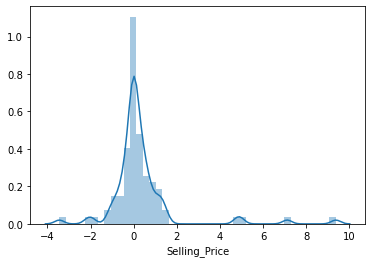

In [108]:
sns.distplot(y_test-prediction)

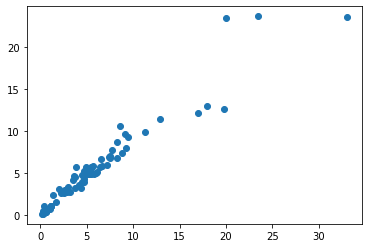

In [109]:
plt.scatter(y_test,prediction)

In [110]:

from sklearn import metrics

In [112]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 0.751100166698381
MSE: 2.565047475111015
RMSE: 1.6015765592412419
